# StatCast Pitcher Data Clustering

## Load Data

In [357]:
import pandas as pd
import numpy as np

data_directory = "./statcast_pitcher_data/"

all_years = []

for year in range(2020, 2026):   # includes 2025
    print(f"Loading {year}...")

    # -----------------------------
    # Load movement + arsenal + spin
    # -----------------------------
    movement = pd.read_csv(f"{data_directory}pitch_movement-{year}.csv")
    arsenal  = pd.read_csv(f"{data_directory}pitch-arsenal-stats-{year}.csv")
    spin_wide = pd.read_csv(f"{data_directory}pitch_arsenals_spin-{year}.csv")

    # -----------------------------
    # Add year column
    # -----------------------------
    movement["year"] = year
    arsenal["year"] = year
    spin_wide["year"] = year

    # -----------------------------
    # Standardize column names
    # -----------------------------
    arsenal = arsenal.rename(columns={"player_id": "pitcher_id"})
    spin_wide = spin_wide.rename(columns={"pitcher": "pitcher_id"})

    # -----------------------------
    # Ensure pitch_type is uppercase
    # -----------------------------
    movement["pitch_type"] = movement["pitch_type"].str.upper()
    arsenal["pitch_type"] = arsenal["pitch_type"].str.upper()

    # -----------------------------
    # Melt spin table into long format
    # -----------------------------
    spin_long = spin_wide.melt(
        id_vars=["pitcher_id", "year"],
        value_vars=["ff_avg_spin", "si_avg_spin", "fc_avg_spin",
                    "sl_avg_spin", "ch_avg_spin", "cu_avg_spin",
                    "fs_avg_spin", "kn_avg_spin", "st_avg_spin", "sv_avg_spin"],
        var_name="pitch_type",
        value_name="spin_rate"
    )

    # Convert "ff_avg_spin" → "FF"
    spin_long["pitch_type"] = spin_long["pitch_type"].str.slice(0, 2).str.upper()

    # -----------------------------
    # Filter essential movement columns ONLY
    # -----------------------------
    movement_cols = [
        "pitcher_id",
        "pitch_type",
        "pitch_hand",
        "avg_speed",                  # velocity
        "pitches_thrown",             # sample size
        "pitcher_break_z_induced",    # IVB
        "pitcher_break_x",            # HB
        "year"
    ]

    movement_small = movement[movement_cols]

    # -----------------------------
    # Merge movement + spin + arsenal
    # -----------------------------
    merged = (
        movement_small
        .merge(spin_long, on=["pitcher_id", "pitch_type", "year"], how="left")
        .merge(arsenal, on=["pitcher_id", "pitch_type", "year"], how="left")
    )

    # Add to list
    all_years.append(merged)

# -----------------------------
# Combine all years into one dataset
# -----------------------------
pitch_data_all_years = pd.concat(all_years, ignore_index=True)

print("Final dataset shape:", pitch_data_all_years.shape)
print(pitch_data_all_years.head())
print(pitch_data_all_years.columns.tolist())

usage = (
    pitch_data_all_years
    .groupby(["pitcher_id", "year", "pitch_type"])["pitch_usage"]
    .sum()
    .reset_index()
)

usage.head()
usage['year'].unique()

Loading 2020...
Loading 2021...
Loading 2022...
Loading 2023...
Loading 2024...
Loading 2025...
Final dataset shape: (10246, 27)
   pitcher_id pitch_type pitch_hand  avg_speed  pitches_thrown  \
0      458681         FF          R       94.0             700   
1      622608         FF          R       94.3             635   
2      543037         FF          R       96.7             632   
3      571760         FF          L       91.5             627   
4      608337         FF          R       94.0             614   

   pitcher_break_z_induced  pitcher_break_x  year  spin_rate  \
0                     15.6              6.7  2020     2491.0   
1                     10.6              5.9  2020     2140.0   
2                     17.9             12.2  2020     2505.0   
3                     15.7             13.8  2020     2435.0   
4                     18.5              7.1  2020     2349.0   

  last_name, first_name  ...     ba    slg   woba  whiff_percent  k_percent  \
0         

array([2020, 2021, 2022, 2023, 2024, 2025])

In [358]:
# import pandas as pd
# import numpy as np

# data_directory = "./statcast_pitcher_data/"

# # Load 2025 data
# movement = pd.read_csv(f"{data_directory}pitch_movement-2025.csv")
# arsenal = pd.read_csv(f"{data_directory}pitch-arsenal-stats-2025.csv")
# arsenals_avg_spin = pd.read_csv(f"{data_directory}pitch_arsenals_spin-2025.csv")

# # Add year column
# movement["year"] = 2025
# arsenal["year"] = 2025
# arsenals_avg_spin["year"] = 2025 

# arsenal = arsenal.rename(columns={"player_id": "pitcher_id"})

# print(movement.head())
# print(arsenal.head())
# print(arsenals_avg_spin.head())


In [359]:
# print(movement.columns.tolist())

# print(arsenal.columns.tolist())

# # print(arsenals_avg_spin.columns.tolist())

In [360]:
# spin = arsenals_avg_spin.rename(columns={"pitcher": "pitcher_id"})

# # Melt wide to long
# spin_long = spin.melt(
#     id_vars=["pitcher_id", "year"],
#     value_vars=["ff_avg_spin", "si_avg_spin", "fc_avg_spin",
#                 "sl_avg_spin", "ch_avg_spin", "cu_avg_spin",
#                 "fs_avg_spin", "kn_avg_spin", "st_avg_spin", "sv_avg_spin"],
#     var_name="pitch_type",
#     value_name="spin_rate"
# )

# # Convert column names like "ff_avg_spin" → "FF"
# spin_long["pitch_type"] = spin_long["pitch_type"].str.slice(0, 2).str.upper()

# spin_long.head()


In [361]:
# # Essential movement features
# movement_cols = [
#     "pitcher_id", "pitch_type", "throws",
#     "release_speed", 
#     "induced_vert_break",
#     "induced_horz_break",
#     "spin_rate", 
#     "release_pos_z",
#     "release_pos_x",
#     "extension",
#     "pitches", 
#     "year"
# ]

# movement_cols = [
#     "pitcher_id",
#     "pitch_type",
#     "pitch_hand",
#     "avg_speed",                  # velocity
#     "pitches_thrown",             # sample size
#     "pitcher_break_z_induced",    # IVB
#     "pitcher_break_x",            # HB
#     "year"
# ]


# movement = movement[movement_cols]


In [362]:
# merged_2025 = (
#     movement
#     .merge(spin_long, on=["pitcher_id", "pitch_type", "year"], how="left")
#     .merge(arsenal, on=["pitcher_id", "pitch_type", "year"], how="left")
# )

In [363]:
# 1. Show all column names
print("=== COLUMNS ===")
print(pitch_data_all_years.columns.tolist())
print("\n")

# 2. Show first few rows
print("=== HEAD (first 10 rows) ===")
display(pitch_data_all_years.head(10))
print("\n")

# 3. Number of rows + unique pitch types
print("=== ROW COUNT + UNIQUE PITCH TYPES ===")
print("Row count:", len(pitch_data_all_years))
print("Pitch types:", pitch_data_all_years["pitch_type"].unique())
print("\n")

# 4. Check missing values for merge keys
print("=== MISSING MERGE KEYS ===")
print(pitch_data_all_years[["pitcher_id", "pitch_type", "pitch_hand", "year"]].isna().sum())
print("\n")

# 5. Check how many RHP 4-seam fastballs exist
print("=== RHP FF COUNT ===")
ff_rhp_2025 = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "FF") &
    (pitch_data_all_years["pitch_hand"] == "R")
]
print("RHP FF rows:", ff_rhp_2025.shape)
print("\n")

# 6. Check missing spin_rate for RHP FF
print("=== MISSING spin_rate for RHP FF ===")
print(ff_rhp_2025["spin_rate"].isna().sum())
print("\n")

# 7. Check missing IVB and HB
print("=== MISSING IVB/HB ===")
print(pitch_data_all_years[["pitcher_break_z_induced", "pitcher_break_x"]].isna().sum())


=== COLUMNS ===
['pitcher_id', 'pitch_type', 'pitch_hand', 'avg_speed', 'pitches_thrown', 'pitcher_break_z_induced', 'pitcher_break_x', 'year', 'spin_rate', 'last_name, first_name', 'team_name_alt', 'pitch_name', 'run_value_per_100', 'run_value', 'pitches', 'pitch_usage', 'pa', 'ba', 'slg', 'woba', 'whiff_percent', 'k_percent', 'put_away', 'est_ba', 'est_slg', 'est_woba', 'hard_hit_percent']


=== HEAD (first 10 rows) ===


,pitcher_id,pitch_type,pitch_hand,avg_speed,pitches_thrown,pitcher_break_z_induced,pitcher_break_x,year,spin_rate,"last_name, first_name",...,ba,slg,woba,whiff_percent,k_percent,put_away,est_ba,est_slg,est_woba,hard_hit_percent
0,458681,FF,R,94.0,700,15.6,6.7,2020,2491.0,"Lynn, Lance",...,0.207,0.413,0.309,29.4,27.9,21.6,0.211,0.396,0.293,36.2
1,622608,FF,R,94.3,635,10.6,5.9,2020,2140.0,"Senzatela, Antonio",...,0.313,0.460,0.374,11.8,9.1,10.3,0.307,0.458,0.363,45.9
2,543037,FF,R,96.7,632,17.9,12.2,2020,2505.0,"Cole, Gerrit",...,0.226,0.466,0.323,25.9,22.3,19.9,0.228,0.476,0.322,47.7
3,571760,FF,L,91.5,627,15.7,13.8,2020,2435.0,"Heaney, Andrew",...,0.267,0.481,0.361,25.2,24.2,18.5,0.254,0.487,0.350,44.3
4,608337,FF,R,94.0,614,18.5,7.1,2020,2349.0,"Giolito, Lucas",...,0.201,0.306,0.263,29.0,31.6,22.5,0.221,0.362,0.290,46.1
5,663903,SI,R,93.3,613,12.1,13.7,2020,2241.0,"Singer, Brady",...,0.236,0.317,0.298,18.3,25.4,20.9,0.223,0.343,0.298,39.8
6,607192,FF,R,96.9,584,17.4,0.6,2020,2412.0,"Glasnow, Tyler",...,0.246,0.460,0.349,23.9,22.8,24.3,0.241,0.469,0.346,46.8
7,664285,SI,L,93.0,579,5.6,12.7,2020,2249.0,"Valdez, Framber",...,0.333,0.428,0.367,13.2,7.9,14.6,0.307,0.489,0.378,55.8
8,663978,FF,R,94.1,560,16.3,9.8,2020,2172.0,"Paddack, Chris",...,0.308,0.658,0.418,20.9,19.8,16.7,0.307,0.595,0.400,57.3
9,664299,FF,R,92.2,560,18.1,7.0,2020,2364.0,"Javier, Cristian",...,0.208,0.442,0.322,19.5,19.1,17.8,0.214,0.415,0.315,36.8




=== ROW COUNT + UNIQUE PITCH TYPES ===
Row count: 10246
Pitch types: ['FF' 'SI' 'SL' 'CH' 'CU' 'FC' 'SV' 'FS' 'ST' 'FO' 'KN' 'SC']


=== MISSING MERGE KEYS ===
pitcher_id    0
pitch_type    0
pitch_hand    0
year          0
dtype: int64


=== RHP FF COUNT ===
RHP FF rows: (2081, 27)


=== MISSING spin_rate for RHP FF ===
0


=== MISSING IVB/HB ===
pitcher_break_z_induced    0
pitcher_break_x            0
dtype: int64


## Clustering by Pitch Type

### Righty Pitchers

#### 4-Seam Fastballs

Rows after filtering: 2081
Cluster counts:
cluster
0    1165
1     916
Name: count, dtype: int64

Centroids:
   avg_speed  pitcher_break_z_induced  pitcher_break_x    spin_rate
0  94.526311                16.913929         5.896561  2363.702494
1  94.182789                14.386492         9.456209  2214.122004


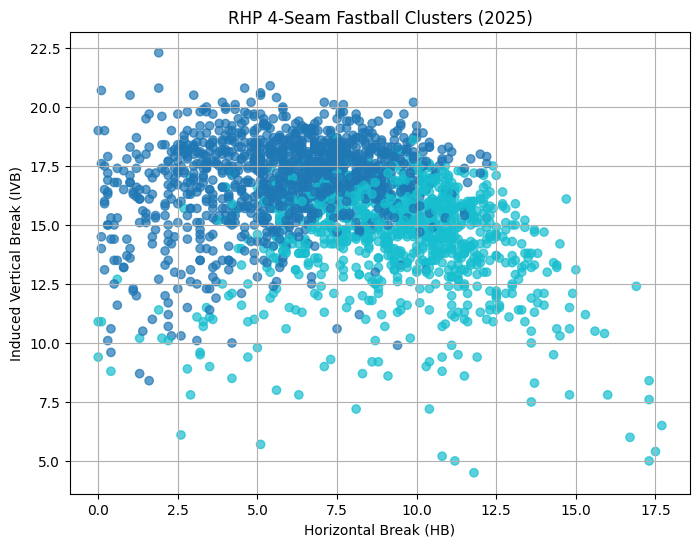

In [364]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ================================
# Filter to RHP 4-Seam Fastballs
# ================================
ff_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "FF") &
    (pitch_data_all_years["pitch_hand"] == "R")
].copy()

# Apply min pitch threshold
ff_rhp = ff_rhp[ff_rhp["pitches_thrown"] >= 100].copy()

print("Rows after filtering:", len(ff_rhp))

# ================================
# Select features for clustering
# ================================
features = [
    "avg_speed",                  # velocity
    "pitcher_break_z_induced",    # IVB
    "pitcher_break_x",            # HB
    "spin_rate"                   # spin
]

X = ff_rhp[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# KMeans clustering (k=3 to start)
# ================================
k = 2
kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
ff_rhp["cluster"] = kmeans.fit_predict(X_scaled)

# Show cluster counts
print("Cluster counts:")
print(ff_rhp["cluster"].value_counts())

# ================================
# Centroids (interpretable values)
# ================================
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features
)
print("\nCentroids:")
print(centroids)

# ================================
# Scatter plot: HB vs IVB colored by cluster
# ================================
plt.figure(figsize=(8,6))
plt.scatter(
    ff_rhp["pitcher_break_x"],
    ff_rhp["pitcher_break_z_induced"],
    c=ff_rhp["cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("Horizontal Break (HB)")
plt.ylabel("Induced Vertical Break (IVB)")
plt.title("RHP 4-Seam Fastball Clusters (2025)")
plt.grid(True)
plt.show()



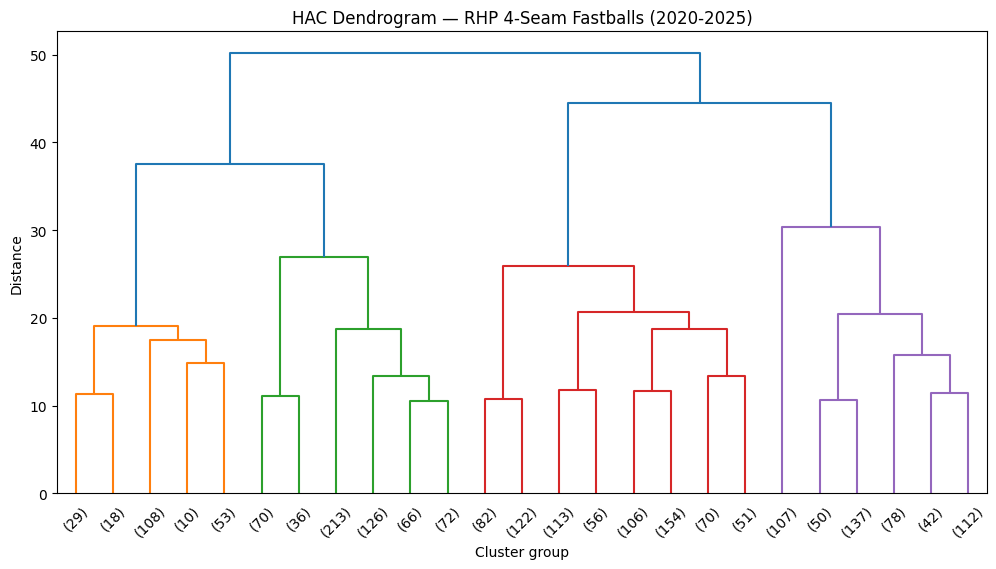

hac_cluster
2    1280
1     801
Name: count, dtype: int64


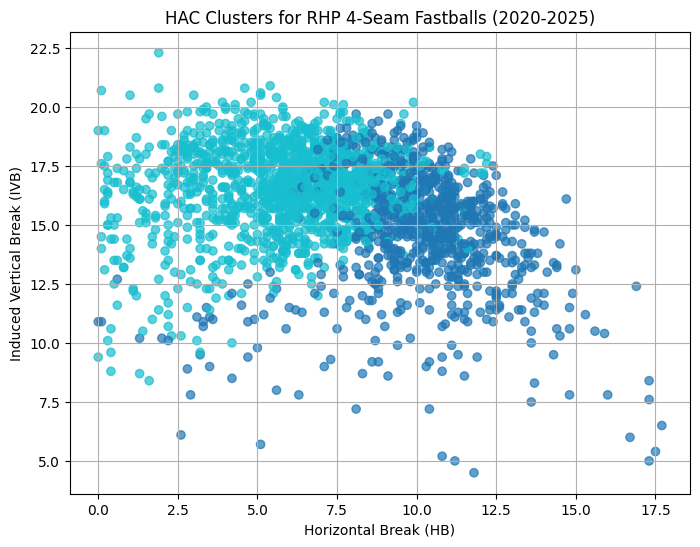

In [365]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Extract features
X = ff_rhp[["avg_speed", "pitcher_break_z_induced", "pitcher_break_x", "spin_rate"]].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform HAC with Ward linkage
Z = linkage(X_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP 4-Seam Fastballs (2020-2025)")
plt.xlabel("Cluster group")
plt.ylabel("Distance")
plt.show()

# Cut tree into clusters (choose k=3 or based on dendrogram)
k = 2
ff_rhp["hac_cluster"] = fcluster(Z, k, criterion="maxclust")

# Show counts
print(ff_rhp["hac_cluster"].value_counts())

# Plot HB vs IVB with HAC clusters
plt.figure(figsize=(8,6))
plt.scatter(
    ff_rhp["pitcher_break_x"],
    ff_rhp["pitcher_break_z_induced"],
    c=ff_rhp["hac_cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("Horizontal Break (HB)")
plt.ylabel("Induced Vertical Break (IVB)")
plt.title("HAC Clusters for RHP 4-Seam Fastballs (2020-2025)")
plt.grid(True)
plt.show()


Cluster counts:
hac_cluster
3    754
2    583
5    419
1    218
4    107
Name: count, dtype: int64


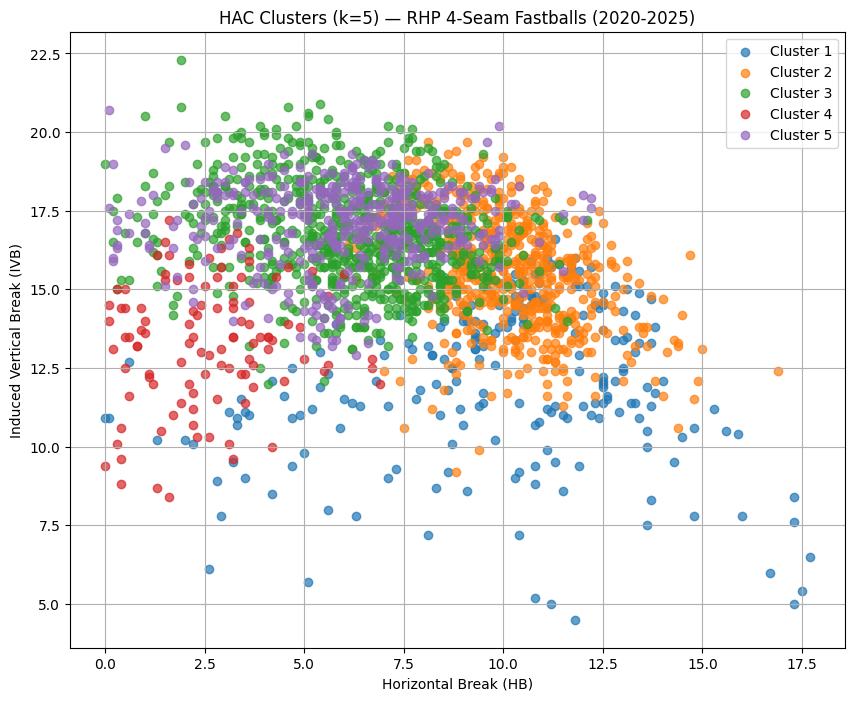

In [366]:
# =============================
# HAC Clustering with k=4
# =============================

from scipy.cluster.hierarchy import fcluster

k = 5
ff_rhp["hac_cluster"] = fcluster(Z, k, criterion="maxclust")

print("Cluster counts:")
print(ff_rhp["hac_cluster"].value_counts())

# =============================
# Plot each cluster separately
# =============================

import matplotlib.pyplot as plt

clusters = sorted(ff_rhp["hac_cluster"].unique())

plt.figure(figsize=(10, 8))

for c in clusters:
    subset = ff_rhp[ff_rhp["hac_cluster"] == c]
    
    plt.scatter(
        subset["pitcher_break_x"],
        subset["pitcher_break_z_induced"],
        label=f"Cluster {c}",
        alpha=0.7
    )

plt.xlabel("Horizontal Break (HB)")
plt.ylabel("Induced Vertical Break (IVB)")
plt.title(f"HAC Clusters (k={k}) — RHP 4-Seam Fastballs (2020-2025)")
plt.legend()
plt.grid(True)
plt.show()


k=2: silhouette=0.1547
k=3: silhouette=0.1409
k=4: silhouette=0.1412
k=5: silhouette=0.1433
k=6: silhouette=0.1354
k=7: silhouette=0.1276
k=8: silhouette=0.1205
k=9: silhouette=0.1150
k=10: silhouette=0.1211


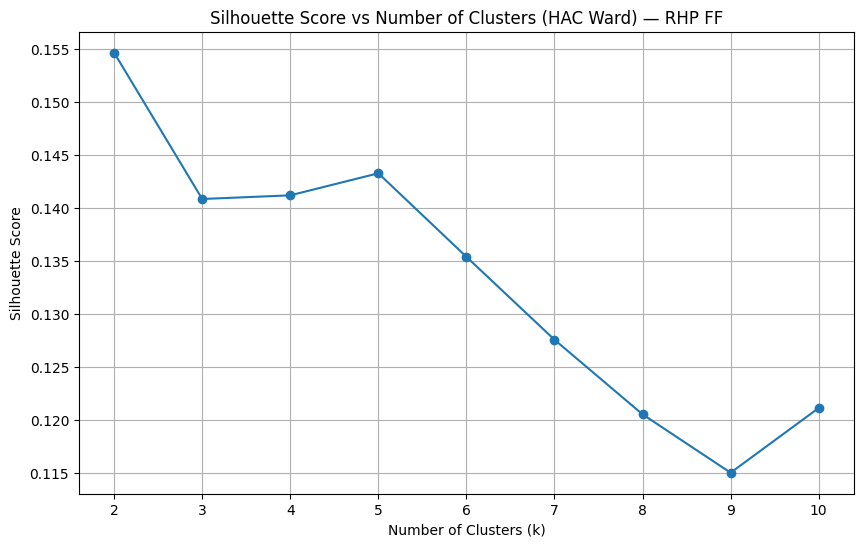

In [367]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

# --- Make sure X_scaled is defined from earlier ---
# X_scaled = scaler.fit_transform(X)

# Run HAC linkage ONCE
Z = linkage(X_scaled, method="ward")

sil_scores = []
k_values = range(2, 11)

for k in k_values:
    labels = fcluster(Z, k, criterion="maxclust")
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)
    print(f"k={k}: silhouette={score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10,6))
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (HAC Ward) — RHP FF")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [368]:
centroids = ff_rhp.groupby("hac_cluster")[[
    "avg_speed", 
    "pitcher_break_z_induced", 
    "pitcher_break_x", 
    "spin_rate"
]].mean().round(2)

centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
hac_cluster,,,,
1,92.64,12.06,9.95,2191.58
2,95.19,15.53,10.14,2328.25
3,93.25,16.74,6.15,2224.73
4,93.61,13.32,2.60,2445.27
5,96.36,17.06,6.08,2404.11


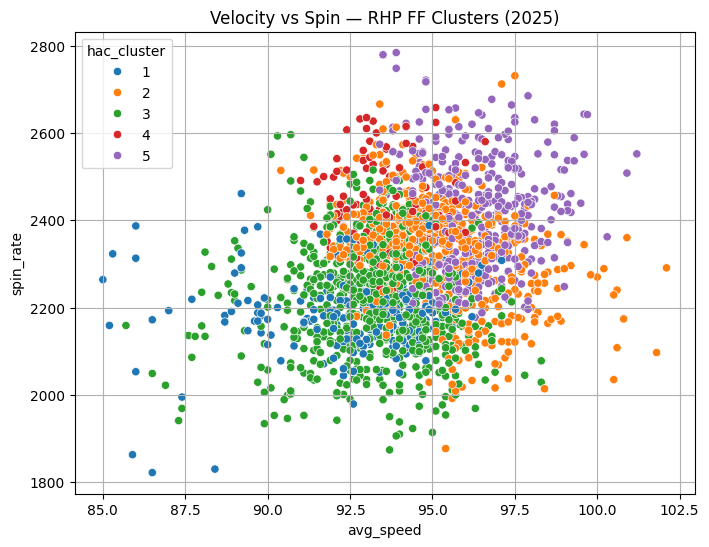

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=ff_rhp, 
    x="avg_speed", y="spin_rate", 
    hue="hac_cluster", palette="tab10"
)
plt.title("Velocity vs Spin — RHP FF Clusters (2025)")
plt.grid(True)
plt.show()


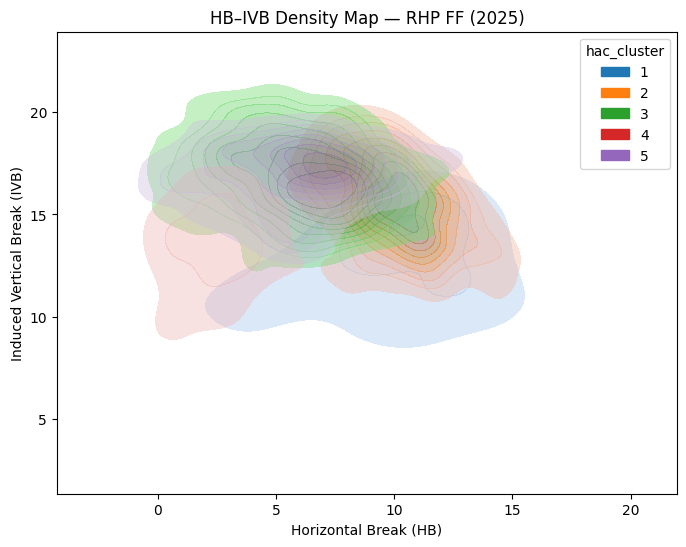

In [370]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=ff_rhp, 
    x="pitcher_break_x",
    y="pitcher_break_z_induced",
    hue="hac_cluster",
    fill=True,
    alpha=0.4,
    levels=10,
    palette="tab10"
)
plt.title("HB–IVB Density Map — RHP FF (2025)")
plt.xlabel("Horizontal Break (HB)")
plt.ylabel("Induced Vertical Break (IVB)")
plt.show()


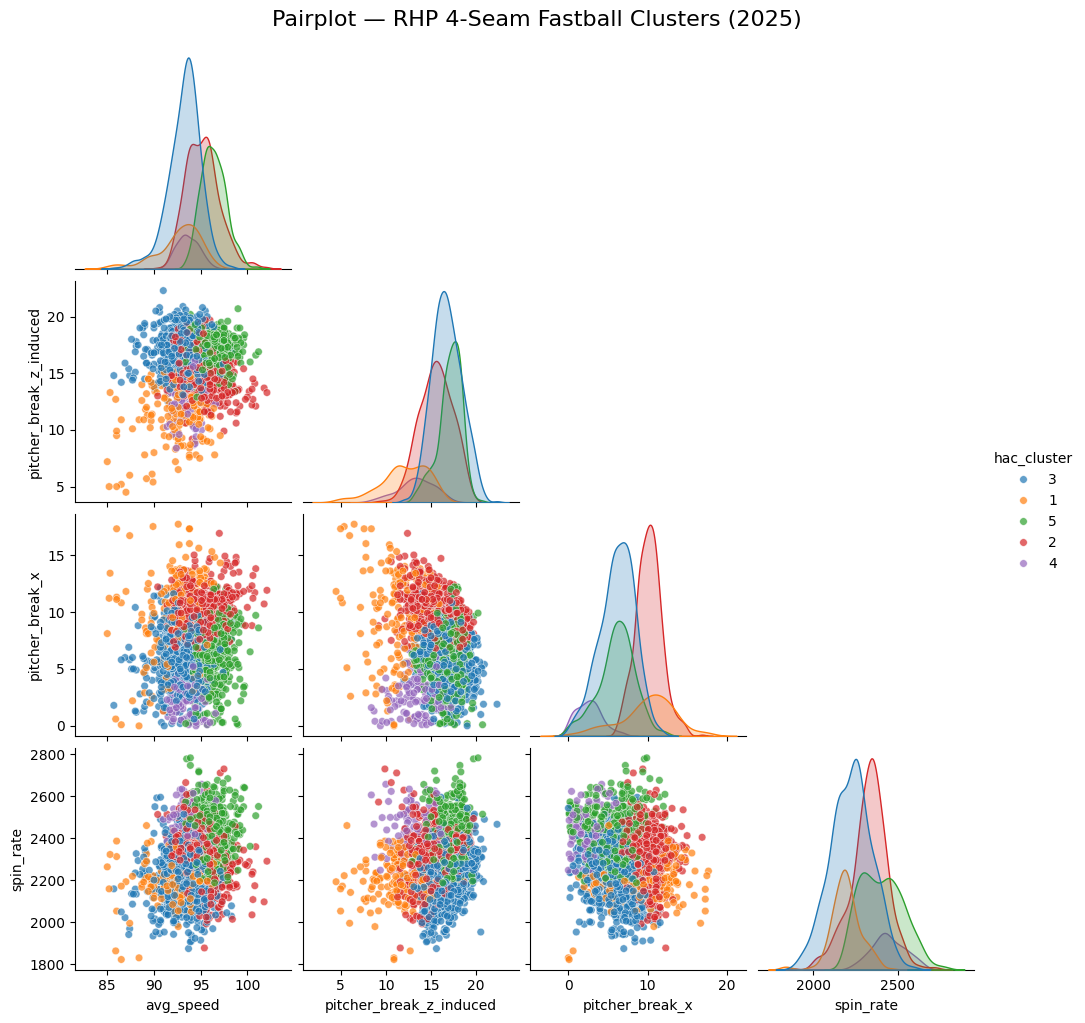

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the main features + cluster label
pairplot_df = ff_rhp[[
    "avg_speed",
    "pitcher_break_z_induced",
    "pitcher_break_x",
    "spin_rate",
    "hac_cluster"
]].copy()

pairplot_df["hac_cluster"] = pairplot_df["hac_cluster"].astype(str)

# Create pairplot
sns.pairplot(
    data=pairplot_df,
    vars=[
        "avg_speed",
        "pitcher_break_z_induced",
        "pitcher_break_x",
        "spin_rate"
    ],
    hue="hac_cluster",
    palette="tab10",
    corner=True,
    diag_kind="kde",
    plot_kws=dict(alpha=0.7, s=30)
)

plt.suptitle("Pairplot — RHP 4-Seam Fastball Clusters (2025)", y=1.02, fontsize=16)
plt.show()


In [372]:
ff_mapping = {
    1: "FF_DEAD_ZONE",
    2: "FF_CUT",
    3: "FF_RIDE",
    4: "FF_LOW_HB_HIGH_SPIN",
    5: "FF_ELITE_RIDE"
}

ff_rhp["FF_type"] = ff_rhp["hac_cluster"].map(ff_mapping)


#### Slider

In [373]:
sl_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "SL") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 75)
].copy()

print("RHP SL rows:", len(sl_rhp))


RHP SL rows: 1382


In [374]:
sl_features = [
    "avg_speed",
    "pitcher_break_z_induced",
    "pitcher_break_x",
    "spin_rate"
]

X_sl = sl_rhp[sl_features].dropna()


In [375]:
from sklearn.preprocessing import StandardScaler

scaler_sl = StandardScaler()
X_sl_scaled = scaler_sl.fit_transform(X_sl)


In [376]:
from scipy.cluster.hierarchy import linkage

Z_sl = linkage(X_sl_scaled, method="ward")


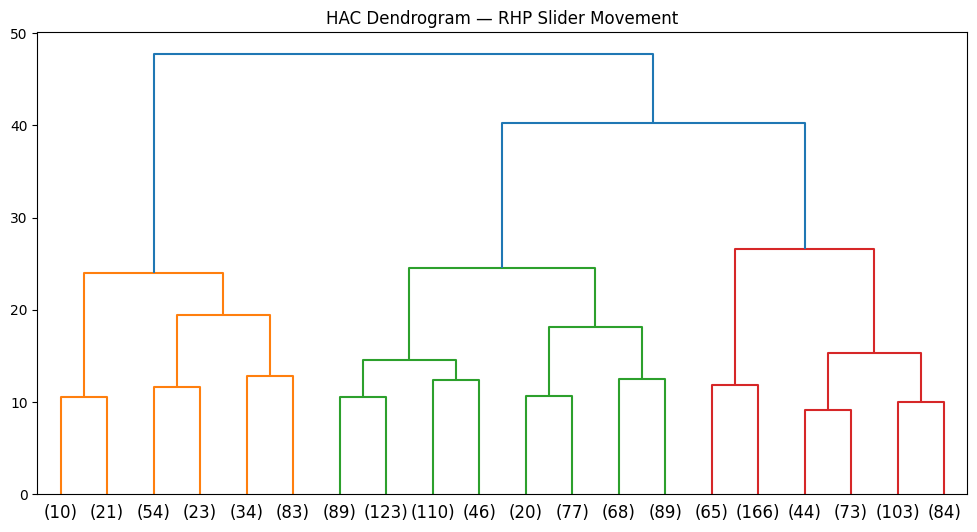

In [377]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 6))
dendrogram(Z_sl, truncate_mode="lastp", p=20)
plt.title("HAC Dendrogram — RHP Slider Movement")
plt.show()



Silhouette scores for RHP Sliders

k=2: silhouette=0.3129
k=3: silhouette=0.1748
k=4: silhouette=0.1434
k=5: silhouette=0.1316
k=6: silhouette=0.1422
k=7: silhouette=0.1522
k=8: silhouette=0.1566
k=9: silhouette=0.1376
k=10: silhouette=0.1360


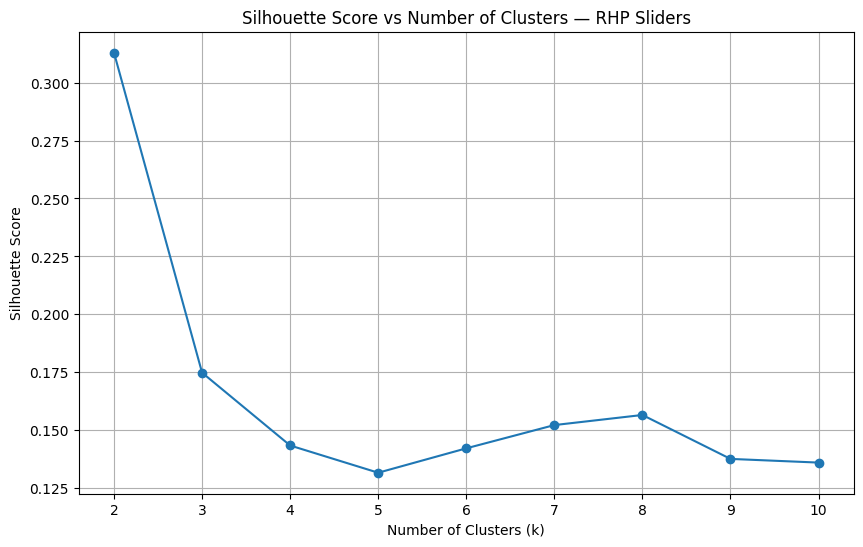

In [378]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt

def hac_silhouette_analysis(X_scaled, title_prefix="HAC Clustering"):
    # Compute HAC linkage once
    Z = linkage(X_scaled, method="ward")

    sil_scores = []
    k_values = range(2, 11)  # silhouette is undefined for k=1

    print(f"\nSilhouette scores for {title_prefix}\n")

    for k in k_values:
        labels = fcluster(Z, k, criterion="maxclust")
        score = silhouette_score(X_scaled, labels)
        sil_scores.append(score)
        print(f"k={k}: silhouette={score:.4f}")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, sil_scores, marker='o')
    plt.title(f"Silhouette Score vs Number of Clusters — {title_prefix}")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    return sil_scores

# ==========================================
# Example usage for SLIDERS (replace with X_ff_scal
sil_scores_sl = hac_silhouette_analysis(X_sl_scaled, title_prefix="RHP Sliders")


In [379]:
from scipy.cluster.hierarchy import fcluster

k = 2
sl_rhp["sl_cluster"] = fcluster(Z_sl, k, criterion="maxclust")


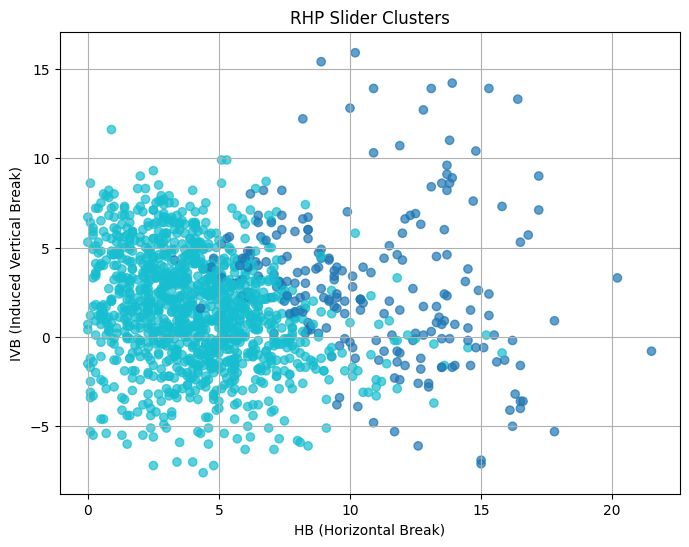

In [380]:
plt.figure(figsize=(8,6))
plt.scatter(
    sl_rhp["pitcher_break_x"],
    sl_rhp["pitcher_break_z_induced"],
    c=sl_rhp["sl_cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("RHP Slider Clusters")
plt.grid(True)
plt.show()


In [381]:
sl_centroids = sl_rhp.groupby("sl_cluster")[sl_features].mean().round(2)
sl_centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
sl_cluster,,,,
1,81.84,2.91,10.63,2485.68
2,86.33,1.47,4.19,2415.41


In [382]:
sl_mapping = {
    1: "SL_SWEEP",
    2: "SL_SHORT_GYRO"
}

sl_rhp["SL_type"] = sl_rhp["sl_cluster"].map(sl_mapping)


#### Sinker

In [383]:
si_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "SI") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 75)
].copy()

print("RHP sinker rows:", len(si_rhp))


RHP sinker rows: 1119


In [384]:
si_features = [
    "avg_speed",
    "pitcher_break_z_induced",   # IVB (will be negative)
    "pitcher_break_x",           # HB
    "spin_rate"
]

X_si = si_rhp[si_features].dropna()


In [385]:
from sklearn.preprocessing import StandardScaler

si_scaler = StandardScaler()
X_si_scaled = si_scaler.fit_transform(X_si)


In [386]:
from scipy.cluster.hierarchy import linkage

Z_si = linkage(X_si_scaled, method="ward")


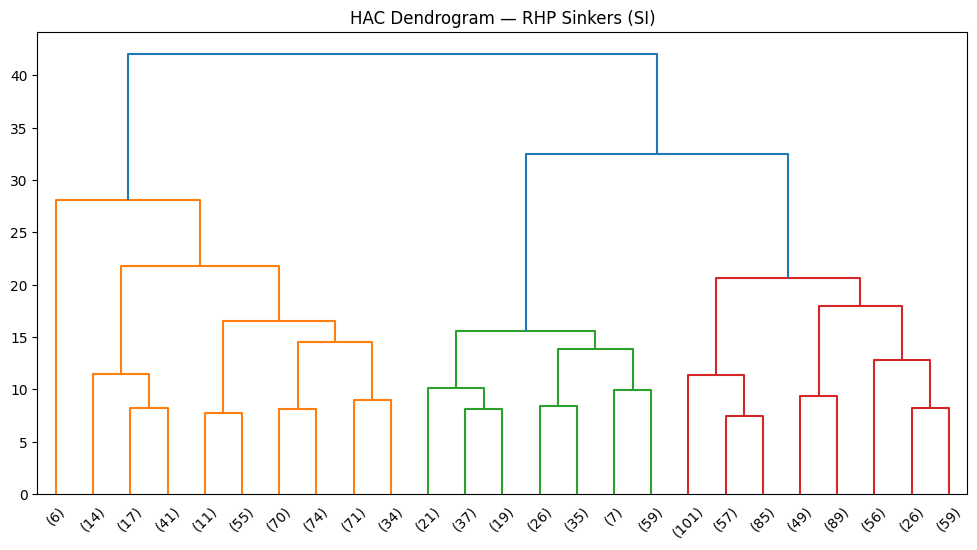

In [387]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(Z_si, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP Sinkers (SI)")
plt.show()



Silhouette scores for RHP Sinkers (SI)

k=2: silhouette=0.2041
k=3: silhouette=0.1814
k=4: silhouette=0.1899
k=5: silhouette=0.1781
k=6: silhouette=0.1103
k=7: silhouette=0.1178
k=8: silhouette=0.1246
k=9: silhouette=0.1336
k=10: silhouette=0.1351


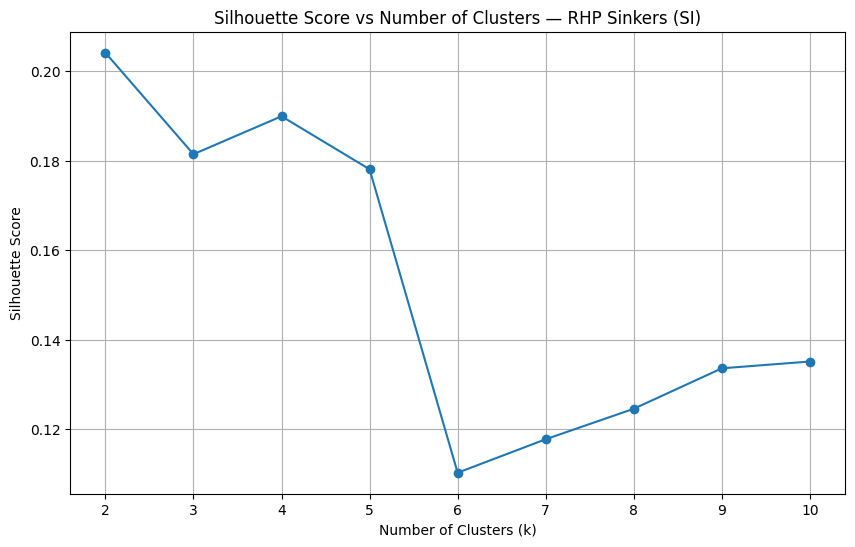

In [388]:
si_sil_scores = hac_silhouette_analysis(
    X_si_scaled, 
    title_prefix="RHP Sinkers (SI)"
)

In [389]:
from scipy.cluster.hierarchy import fcluster

k = 4
si_rhp["si_cluster"] = fcluster(Z_si, k, criterion="maxclust")


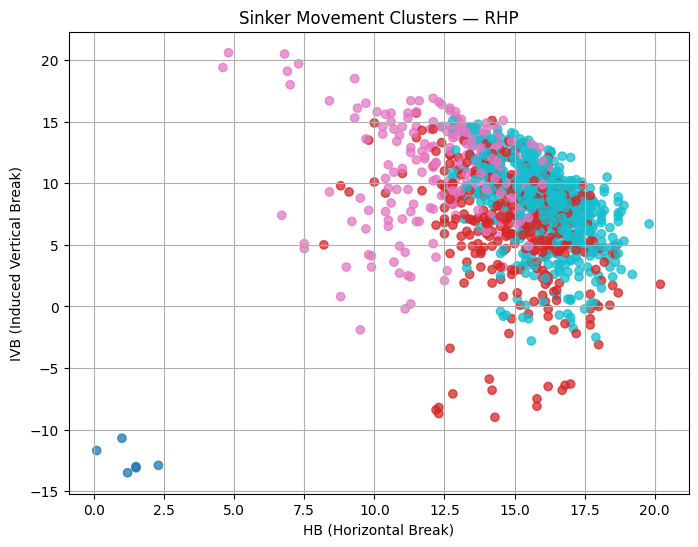

In [390]:
plt.figure(figsize=(8, 6))
plt.scatter(
    si_rhp["pitcher_break_x"],
    si_rhp["pitcher_break_z_induced"],
    c=si_rhp["si_cluster"],
    cmap="tab10",
    alpha=0.75
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("Sinker Movement Clusters — RHP")
plt.grid(True)
plt.show()


In [391]:
si_centroids = si_rhp.groupby("si_cluster")[si_features].mean().round(2)
si_centroids

,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
si_cluster,,,,
1,82.83,-12.48,1.27,1927.83
2,91.74,6.69,15.19,2062.30
3,94.54,11.13,12.33,2322.63
4,95.11,8.30,16.02,2203.04


In [392]:
si_mapping = {
    1: "SI_DROP",
    2: "SI_RUN",
    3: "SI_POWER",
    4: "SI_ELITE_RUN"
}

si_rhp["SI_type"] = si_rhp["si_cluster"].map(si_mapping)


#### Changeup

In [393]:
ch_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "CH") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 50)
].copy()

print("RHP changeup rows:", len(ch_rhp))


RHP changeup rows: 821


In [394]:
ch_features = [
    "avg_speed",
    "pitcher_break_z_induced",   # IVB (often negative)
    "pitcher_break_x",           # HB (fade)
    "spin_rate"
]

X_ch = ch_rhp[ch_features].dropna()


In [395]:
from sklearn.preprocessing import StandardScaler

ch_scaler = StandardScaler()
X_ch_scaled = ch_scaler.fit_transform(X_ch)


In [396]:
from scipy.cluster.hierarchy import linkage

Z_ch = linkage(X_ch_scaled, method="ward")


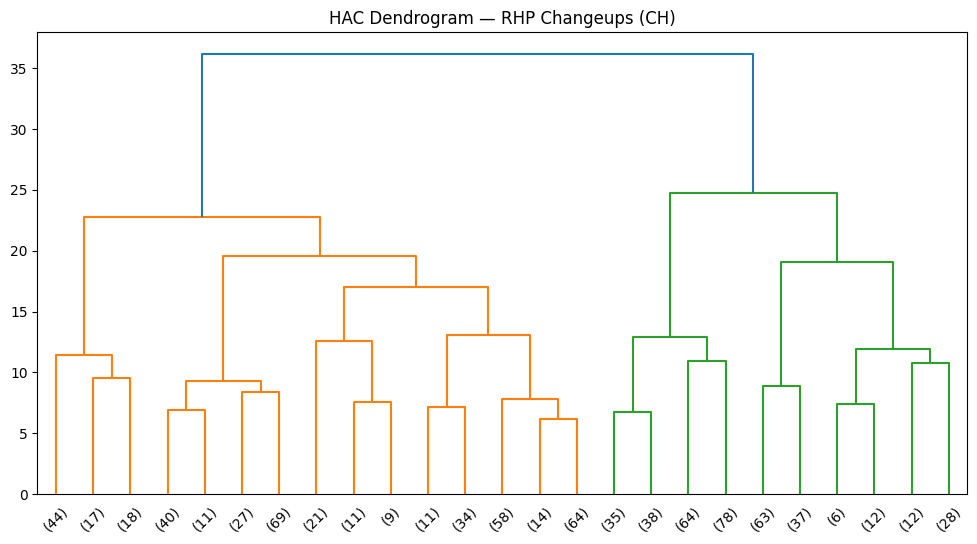

In [397]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(Z_ch, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP Changeups (CH)")
plt.show()



Silhouette Scores for RHP Changeups:

k=2: 0.1893
k=3: 0.1614
k=4: 0.1600
k=5: 0.1482
k=6: 0.1585
k=7: 0.1683
k=8: 0.1594
k=9: 0.1484
k=10: 0.1573


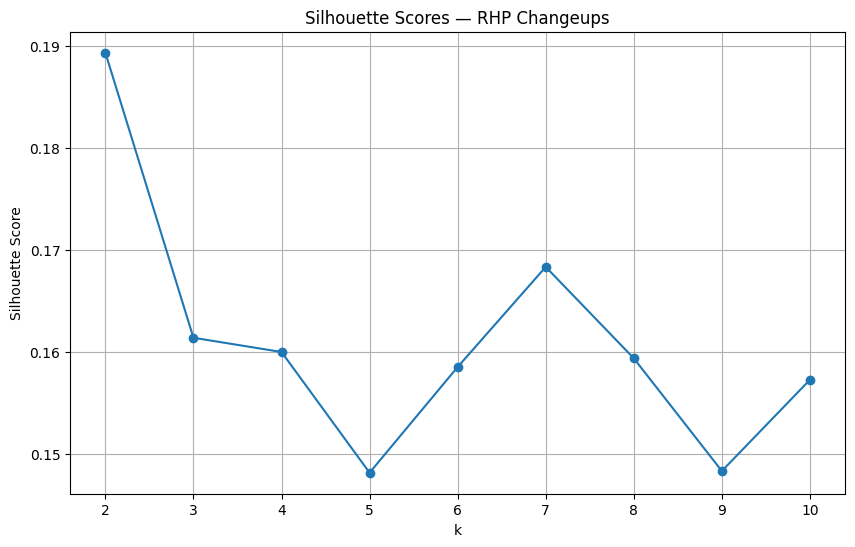

In [398]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

def hac_silhouette_analysis(X_scaled, Z, title_prefix="Clusters"):
    sil_scores = []
    ks = range(2, 11)

    print(f"\nSilhouette Scores for {title_prefix}:\n")
    
    for k in ks:
        labels = fcluster(Z, k, criterion="maxclust")
        score = silhouette_score(X_scaled, labels)
        sil_scores.append(score)
        print(f"k={k}: {score:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(ks, sil_scores, marker='o')
    plt.title(f"Silhouette Scores — {title_prefix}")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

    return sil_scores

sil_scores_ch = hac_silhouette_analysis(X_ch_scaled, Z_ch, title_prefix="RHP Changeups")


In [399]:
k = 2
ch_rhp["ch_cluster"] = fcluster(Z_ch, k, criterion="maxclust")


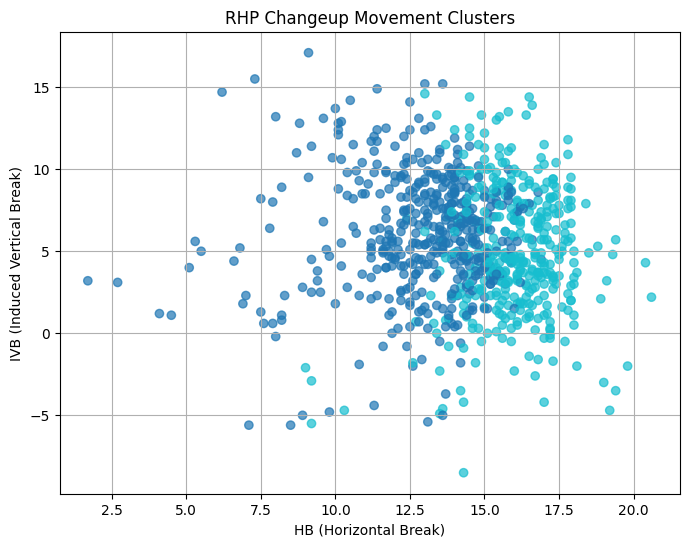

In [400]:
plt.figure(figsize=(8,6))
plt.scatter(
    ch_rhp["pitcher_break_x"],
    ch_rhp["pitcher_break_z_induced"],
    c=ch_rhp["ch_cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("RHP Changeup Movement Clusters")
plt.grid(True)
plt.show()


In [401]:
ch_centroids = ch_rhp.groupby("ch_cluster")[ch_features].mean().round(2)
ch_centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
ch_cluster,,,,
1,85.86,6.06,12.80,1655.98
2,86.59,4.94,15.99,1982.95


In [402]:
ch_mapping = {
    1: "CH_FADE",
    2: "CH_POWER_RUN"
}

ch_rhp["CH_type"] = ch_rhp["ch_cluster"].map(ch_mapping)

#### Curveball

In [403]:
cu_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "CU") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 75)
].copy()

print("RHP curveball rows:", len(cu_rhp))


RHP curveball rows: 805


In [404]:
cu_features = [
    "avg_speed",
    "pitcher_break_z_induced",   # IVB (strongly negative for CBs)
    "pitcher_break_x",           # HB
    "spin_rate"
]

X_cu = cu_rhp[cu_features].dropna()


In [405]:
from sklearn.preprocessing import StandardScaler

cu_scaler = StandardScaler()
X_cu_scaled = cu_scaler.fit_transform(X_cu)


In [406]:
from scipy.cluster.hierarchy import linkage

Z_cu = linkage(X_cu_scaled, method="ward")


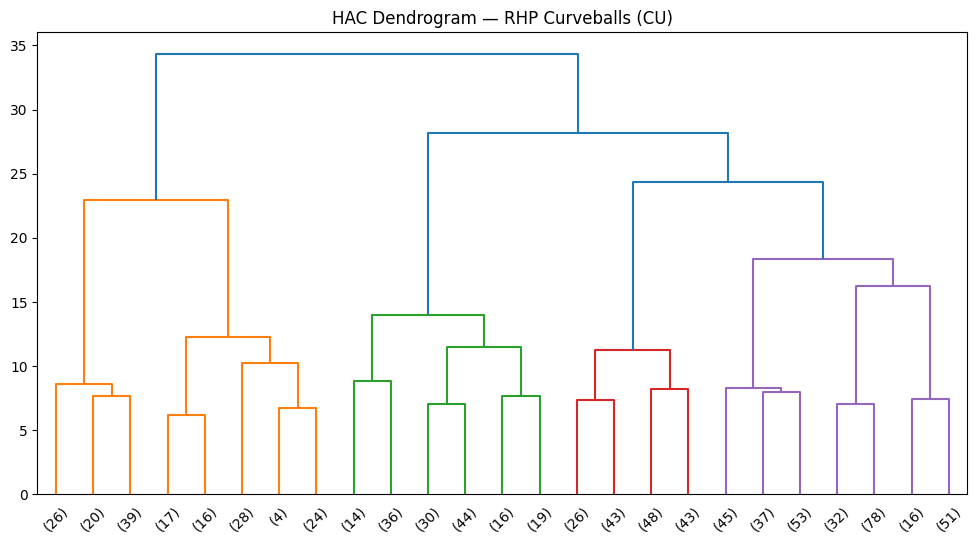

In [407]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(Z_cu, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP Curveballs (CU)")
plt.show()



Silhouette Scores for RHP Curveballs:

k=2: 0.2443
k=3: 0.1751
k=4: 0.1470
k=5: 0.1744
k=6: 0.1644
k=7: 0.1716
k=8: 0.1747
k=9: 0.1736
k=10: 0.1766


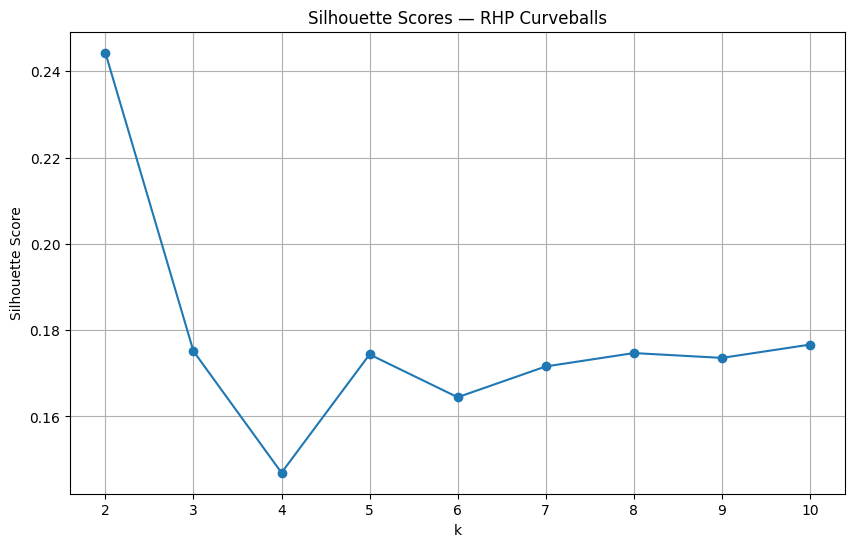

In [408]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

def hac_silhouette_analysis(X_scaled, Z, title_prefix="Clusters"):
    sil_scores = []
    ks = range(2, 11)

    print(f"\nSilhouette Scores for {title_prefix}:\n")
    
    for k in ks:
        labels = fcluster(Z, k, criterion="maxclust")
        score = silhouette_score(X_scaled, labels)
        sil_scores.append(score)
        print(f"k={k}: {score:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(ks, sil_scores, marker='o')
    plt.title(f"Silhouette Scores — {title_prefix}")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

    return sil_scores

sil_scores_cu = hac_silhouette_analysis(X_cu_scaled, Z_cu, title_prefix="RHP Curveballs")


In [409]:
k = 2
cu_rhp["cu_cluster"] = fcluster(Z_cu, k, criterion="maxclust")

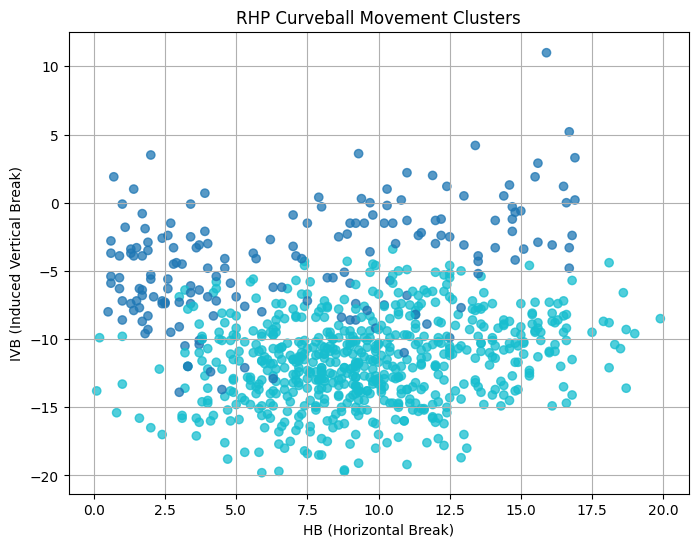

In [410]:
plt.figure(figsize=(8,6))
plt.scatter(
    cu_rhp["pitcher_break_x"],
    cu_rhp["pitcher_break_z_induced"],
    c=cu_rhp["cu_cluster"],
    cmap="tab10",
    alpha=0.75
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("RHP Curveball Movement Clusters")
plt.grid(True)
plt.show()


In [411]:
cu_centroids = cu_rhp.groupby("cu_cluster")[cu_features].mean().round(2)
cu_centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
cu_cluster,,,,
1,82.00,-4.18,7.11,2379.70
2,79.48,-11.62,9.57,2616.53


In [412]:
cu_mapping = {
    1: "CU_POWER",
    2: "CU_LOOP"
}

cu_rhp["CU_type"] = cu_rhp["cu_cluster"].map(cu_mapping)


#### Cutters

In [413]:
fc_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "FC") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 50)
].copy()

print("RHP cutter rows:", len(fc_rhp))


RHP cutter rows: 620


In [414]:
fc_features = [
    "avg_speed",
    "pitcher_break_z_induced",   # IVB (positive = lift, negative = drop)
    "pitcher_break_x",           # HB
    "spin_rate"
]

X_fc = fc_rhp[fc_features].dropna()


In [415]:
from sklearn.preprocessing import StandardScaler

fc_scaler = StandardScaler()
X_fc_scaled = fc_scaler.fit_transform(X_fc)


In [416]:
from scipy.cluster.hierarchy import linkage

Z_fc = linkage(X_fc_scaled, method="ward")


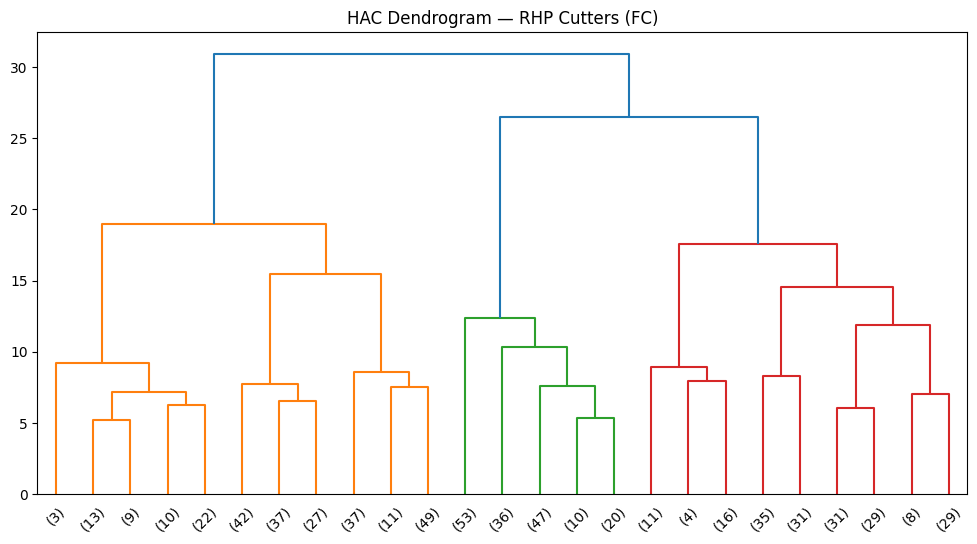

In [417]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(Z_fc, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP Cutters (FC)")
plt.show()



Silhouette Scores for RHP Cutters (FC):

k=2: 0.1779
k=3: 0.1834
k=4: 0.1656
k=5: 0.1746
k=6: 0.1510
k=7: 0.1555
k=8: 0.1554
k=9: 0.1618
k=10: 0.1728


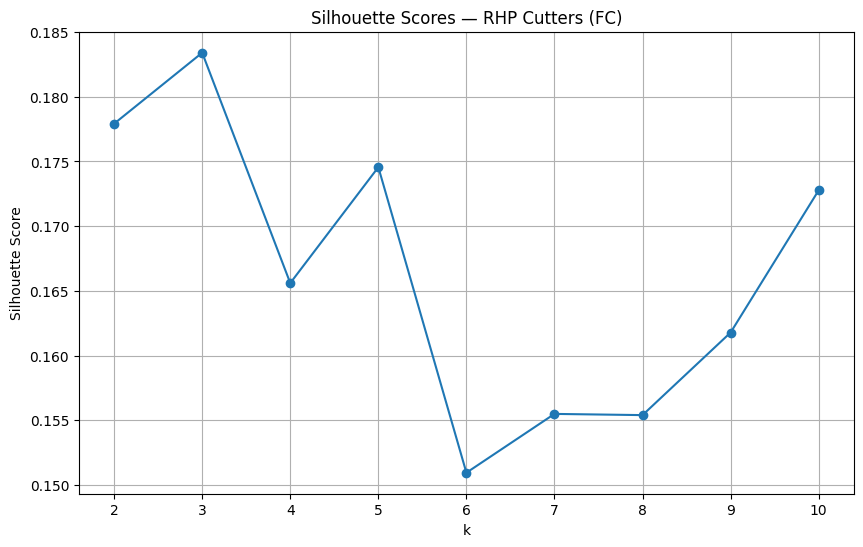

In [418]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

def hac_silhouette_analysis(X_scaled, Z, title_prefix="Clusters"):
    sil_scores = []
    ks = range(2, 11)

    print(f"\nSilhouette Scores for {title_prefix}:\n")
    
    for k in ks:
        labels = fcluster(Z, k, criterion="maxclust")
        score = silhouette_score(X_scaled, labels)
        sil_scores.append(score)
        print(f"k={k}: {score:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(ks, sil_scores, marker='o')
    plt.title(f"Silhouette Scores — {title_prefix}")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.xticks(ks)
    plt.show()

    return sil_scores

sil_scores_fc = hac_silhouette_analysis(
    X_fc_scaled, Z_fc, title_prefix="RHP Cutters (FC)"
)


In [419]:
k = 3
fc_rhp["fc_cluster"] = fcluster(Z_fc, k, criterion="maxclust")


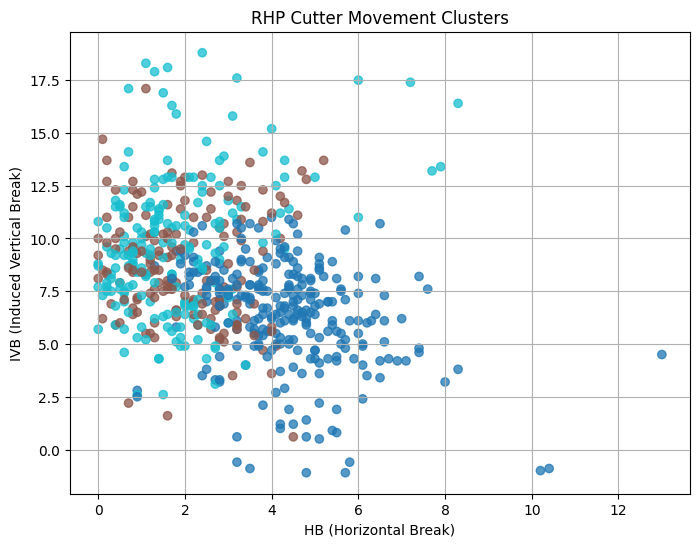

In [420]:
plt.figure(figsize=(8,6))
plt.scatter(
    fc_rhp["pitcher_break_x"],
    fc_rhp["pitcher_break_z_induced"],
    c=fc_rhp["fc_cluster"],
    cmap="tab10",
    alpha=0.75
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("RHP Cutter Movement Clusters")
plt.grid(True)
plt.show()


In [421]:
fc_centroids = fc_rhp.groupby("fc_cluster")[fc_features].mean().round(2)
fc_centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
fc_cluster,,,,
1,88.75,6.34,4.35,2461.20
2,88.47,8.73,2.01,2226.95
3,91.70,9.62,1.84,2485.73


In [422]:
fc_mapping = {
    1: "FC_SLIDE",
    2: "FC_TIGHT",
    3: "FC_POWER"
}

fc_rhp["FC_type"] = fc_rhp["fc_cluster"].map(fc_mapping)


#### Splitters

In [423]:
fs_rhp = pitch_data_all_years[
    (pitch_data_all_years["pitch_type"] == "FS") &
    (pitch_data_all_years["pitch_hand"] == "R") &
    (pitch_data_all_years["pitches_thrown"] >= 30)
].copy()

print("RHP splitter rows:", len(fs_rhp))


RHP splitter rows: 244


In [424]:
fs_features = [
    "avg_speed",
    "pitcher_break_z_induced",   # IVB
    "pitcher_break_x",           # HB
    "spin_rate"
]

X_fs = fs_rhp[fs_features].dropna()


In [425]:
from sklearn.preprocessing import StandardScaler

fs_scaler = StandardScaler()
X_fs_scaled = fs_scaler.fit_transform(X_fs)


In [426]:
from scipy.cluster.hierarchy import linkage

Z_fs = linkage(X_fs_scaled, method="ward")


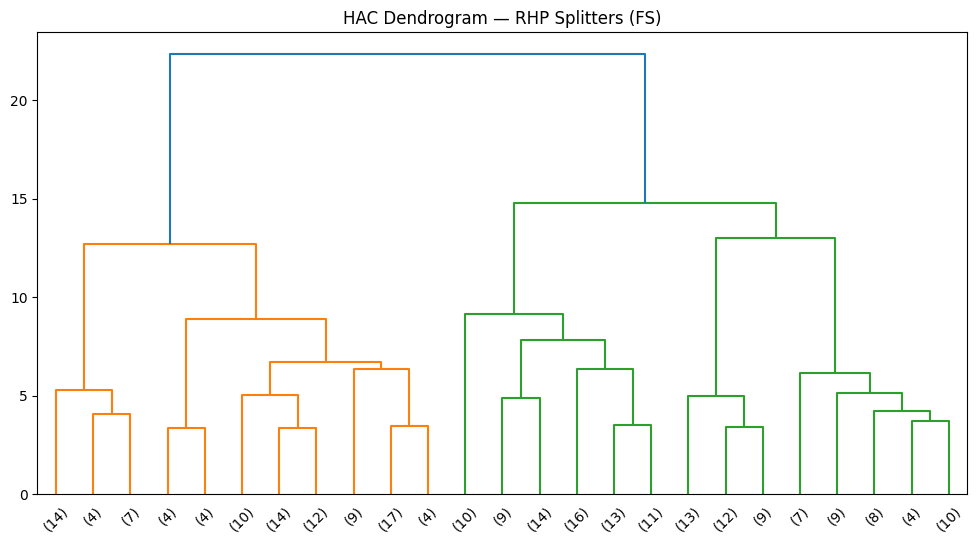

In [427]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
dendrogram(Z_fs, truncate_mode="lastp", p=25)
plt.title("HAC Dendrogram — RHP Splitters (FS)")
plt.show()


k=2: silhouette=0.2210
k=3: silhouette=0.1890
k=4: silhouette=0.1757
k=5: silhouette=0.1945
k=6: silhouette=0.1984
k=7: silhouette=0.2096
k=8: silhouette=0.2144
k=9: silhouette=0.2023
k=10: silhouette=0.1856


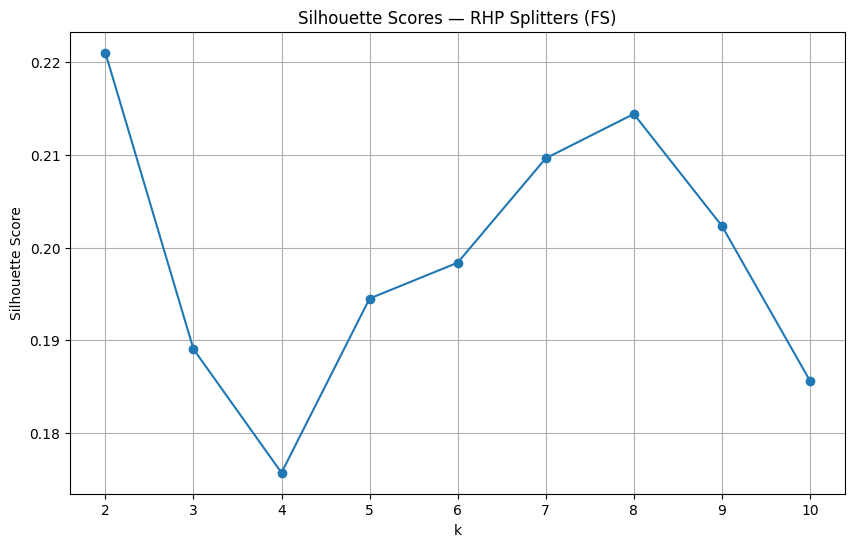

In [428]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

sil_scores_fs = []

for k in range(2, 11):
    labels = fcluster(Z_fs, k, criterion="maxclust")
    score = silhouette_score(X_fs_scaled, labels)
    sil_scores_fs.append(score)
    print(f"k={k}: silhouette={score:.4f}")

plt.figure(figsize=(10,6))
plt.plot(range(2, 11), sil_scores_fs, marker='o')
plt.title("Silhouette Scores — RHP Splitters (FS)")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [429]:
k = 2
fs_rhp["fs_cluster"] = fcluster(Z_fs, k, criterion="maxclust")


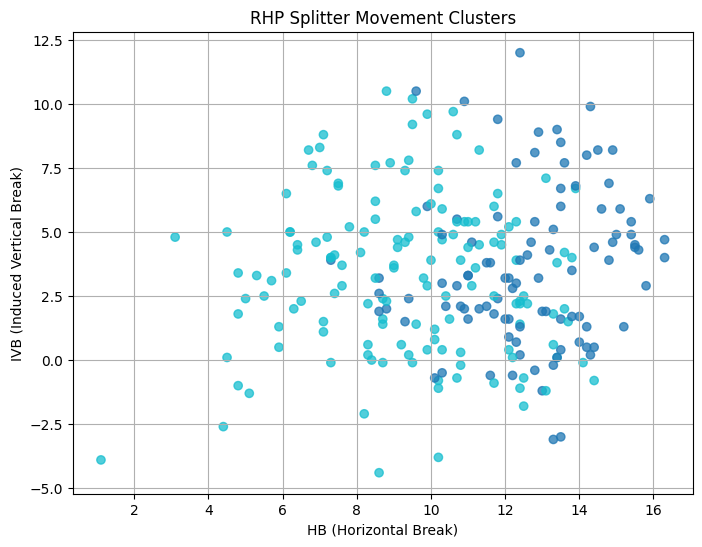

In [430]:
plt.figure(figsize=(8,6))
plt.scatter(
    fs_rhp["pitcher_break_x"],
    fs_rhp["pitcher_break_z_induced"],
    c=fs_rhp["fs_cluster"],
    cmap="tab10",
    alpha=0.75
)
plt.xlabel("HB (Horizontal Break)")
plt.ylabel("IVB (Induced Vertical Break)")
plt.title("RHP Splitter Movement Clusters")
plt.grid(True)
plt.show()


In [431]:
fs_centroids = fs_rhp.groupby("fs_cluster")[fs_features].mean().round(2)
fs_centroids


,avg_speed,pitcher_break_z_induced,pitcher_break_x,spin_rate
fs_cluster,,,,
1,88.31,3.64,12.66,1604.21
2,85.60,3.29,9.38,1166.40


In [432]:
fs_mapping = {
    1: "FS_FIRM",
    2: "FS_DIVE"
}

fs_rhp["FS_type"] = fs_rhp["fs_cluster"].map(fs_mapping)


#### Archetype vectoring

In [433]:
pitcher_year_vectors = (
    ff_rhp[["pitcher_id","year","FF_type"]]
    .merge(sl_rhp[["pitcher_id","year","SL_type"]], on=["pitcher_id","year"], how="left")
    .merge(si_rhp[["pitcher_id","year","SI_type"]], on=["pitcher_id","year"], how="left")
    .merge(ch_rhp[["pitcher_id","year","CH_type"]], on=["pitcher_id","year"], how="left")
    .merge(cu_rhp[["pitcher_id","year","CU_type"]], on=["pitcher_id","year"], how="left")
    .merge(fc_rhp[["pitcher_id","year","FC_type"]], on=["pitcher_id","year"], how="left")
    .merge(fs_rhp[["pitcher_id","year","FS_type"]], on=["pitcher_id","year"], how="left")
)


In [456]:
pitcher_year_vectors.head()
# pitcher_year_vectors.isna().sum()


,pitcher_id,year,FF_type,SL_type,SI_type,CH_type,CU_type,FC_type,FS_type,CH,...,FS,KN,SC,SI,SL,ST,SV,archetype,PC1,PC2
0,458681,2020,4,0,2,2,1,0,2,0.0,...,0.0,0.0,0.0,17.9,0.0,0.0,0.0,5,-2.722114,2.072017
1,622608,2020,1,1,0,0,0,3,2,10.4,...,0.0,0.0,0.0,0.0,24.8,0.0,0.0,0,0.004913,-1.877829
2,543037,2020,2,1,0,2,0,3,2,0.0,...,0.0,0.0,0.0,0.0,24.6,0.0,0.0,1,1.507838,-0.202034
3,608337,2020,4,1,0,0,2,3,2,33.7,...,0.0,0.0,0.0,0.0,14.7,0.0,0.0,0,0.606354,-2.261043
4,607192,2020,2,0,0,2,0,3,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.650336,1.564739


In [435]:
usage = (
    pitch_data_all_years
    .groupby(["pitcher_id", "year", "pitch_type"])["pitch_usage"]
    .sum()
    .reset_index()
)

usage.head()


,pitcher_id,year,pitch_type,pitch_usage
0,424144,2020,SI,43.1
1,424144,2020,SL,43.1
2,425794,2020,CU,38.3
3,425794,2020,FC,22.9
4,425794,2020,SI,27.1


In [436]:
usage_wide = usage.pivot_table(
    index=["pitcher_id", "year"],
    columns="pitch_type",
    values="pitch_usage",
    fill_value=0
).reset_index()


In [437]:
pitcher_year_vectors = pitcher_year_vectors.merge(
    usage_wide, 
    on=["pitcher_id","year"], 
    how="left"
)


In [457]:
pitcher_year_vectors = pitcher_year_vectors.fillna({
    "FF_type": "NONE",
    "SL_type": "NONE",
    "SI_type": "NONE",
    "CH_type": "NONE",
    "CU_type": "NONE",
    "FC_type": "NONE",
    "FS_type": "NONE"
})

In [453]:
pitcher_year_encoded = pd.get_dummies(
    pitcher_year_vectors,
    columns=["FF_type", "SL_type", "SI_type", "CH_type", "CU_type", "FC_type", "FS_type"],
    prefix=["FF", "SL", "SI", "CH", "CU", "FC", "FS"]
)

print(pitcher_year_encoded.head())
print(pitcher_year_encoded.columns.tolist())

   pitcher_id  year    CH    CU    FC    FF   FO   FS   KN   SC  ...  \
0      458681  2020   0.0   9.1  22.2  49.8  0.0  0.0  0.0  0.0  ...   
1      622608  2020  10.4   8.9   0.0  55.9  0.0  0.0  0.0  0.0  ...   
2      543037  2020   0.0  17.0   0.0  52.5  0.0  0.0  0.0  0.0  ...   
3      608337  2020  33.7   0.0   0.0  50.6  0.0  0.0  0.0  0.0  ...   
4      607192  2020   0.0  34.8   0.0  60.6  0.0  0.0  0.0  0.0  ...   

   CU_CU_LOOP  CU_CU_POWER  CU_NONE  FC_FC_POWER  FC_FC_SLIDE  FC_FC_TIGHT  \
0       False         True    False         True        False        False   
1        True        False    False        False        False        False   
2        True        False    False        False        False        False   
3       False        False     True        False        False        False   
4        True        False    False        False        False        False   

   FC_NONE  FS_FS_DIVE  FS_FS_FIRM  FS_NONE  
0    False       False       False     True  
1     

In [444]:
pitcher_year_final = pitcher_year_encoded.copy()


In [445]:
X_pitcher_year = pitcher_year_encoded.drop(columns=["pitcher_id","year"])


In [446]:
from sklearn.preprocessing import StandardScaler

py_scaler = StandardScaler()
X_pitcher_year_scaled = py_scaler.fit_transform(X_pitcher_year)


In [447]:
from sklearn.cluster import KMeans

k = 6  # we can tune this later
kmeans_py = KMeans(n_clusters=k, random_state=42)
pitcher_year_vectors["archetype"] = kmeans_py.fit_predict(X_pitcher_year_scaled)


In [448]:
centroids = pd.DataFrame(
    kmeans_py.cluster_centers_,
    columns=X_pitcher_year.columns
).round(3)

centroids


,CH,CU,FC,FF,FO,FS,KN,SC,SI,SL,...,CU_CU_LOOP,CU_CU_POWER,CU_NONE,FC_FC_POWER,FC_FC_SLIDE,FC_FC_TIGHT,FC_NONE,FS_FS_DIVE,FS_FS_FIRM,FS_NONE
0,1.457,-0.179,-0.304,0.311,0.0,-0.303,-0.031,-0.022,-0.610,0.039,...,-0.059,0.002,0.054,-0.039,-0.324,-0.041,0.286,-0.257,-0.209,0.340
1,-0.606,-0.035,-0.441,0.600,0.0,0.125,-0.031,0.030,-0.615,0.218,...,-0.211,-0.034,0.215,-0.207,-0.345,-0.224,0.498,0.092,-0.010,-0.066
2,-0.247,0.089,2.041,-0.239,0.0,0.063,-0.031,-0.022,-0.273,-0.689,...,0.287,-0.145,-0.189,0.215,2.203,0.214,-1.875,-0.012,0.171,-0.102
3,0.229,0.070,-0.035,-0.935,0.0,0.055,0.132,-0.022,1.320,-0.073,...,0.149,0.160,-0.226,0.269,-0.270,0.276,-0.105,0.092,0.110,-0.145
4,0.270,-0.056,-0.099,-1.080,0.0,-0.248,-0.031,-0.022,1.542,-0.028,...,-0.073,0.048,0.043,0.067,-0.264,0.407,-0.069,-0.188,-0.084,0.204
5,0.018,0.355,0.208,-0.574,0.0,-0.150,-0.031,-0.022,0.756,-0.067,...,0.660,-0.039,-0.596,0.235,0.176,0.021,-0.275,-0.067,0.020,0.040


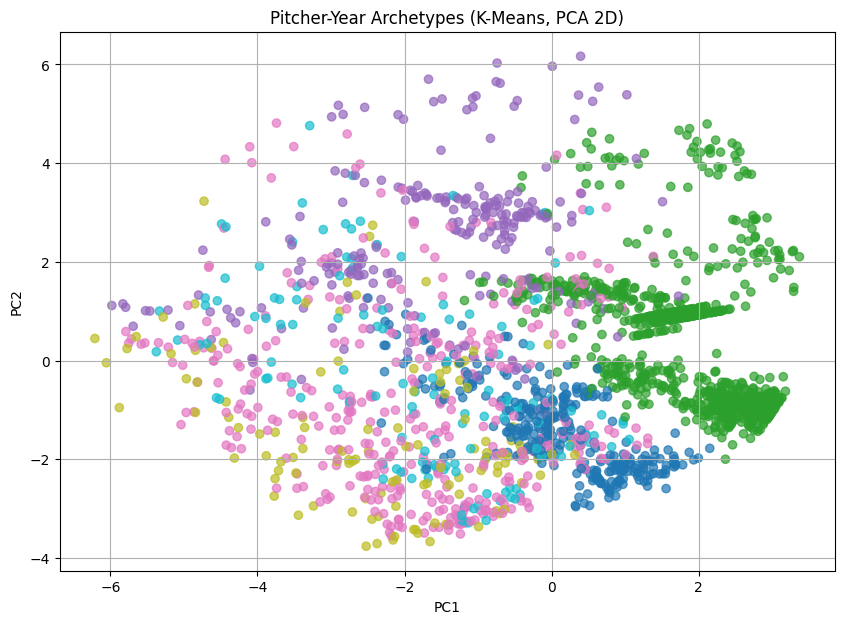

In [465]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pitcher_year_scaled)

pitcher_year_vectors["PC1"] = X_pca[:,0]
pitcher_year_vectors["PC2"] = X_pca[:,1]

plt.figure(figsize=(10,7))
plt.scatter(
    pitcher_year_vectors["PC1"],
    pitcher_year_vectors["PC2"],
    c=pitcher_year_vectors["archetype"],
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Pitcher-Year Archetypes (K-Means, PCA 2D)")
plt.grid(True)
plt.show()


In [451]:
!pip install umap-learn


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 14.2 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.1 MB 21.8 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/38.1 MB 22.6 MB/s eta 0:00:02
   -------------- ------------------------- 13.9/38.1 MB 21.8 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/38.1 MB 20.8 MB/s eta 0:00:01
   ----------------------- ---------------- 22.5/38.1 MB 21.1 MB/s eta 0:00:01
   ---------------------------- ----------- 27.3/38.1 MB 21.3 MB/s eta 0:00:01
   --------------------------------- ------ 32.0/38.1 MB 21.5 MB/s eta 0:00:01
   ------------------------------------ --- 35.1/38.1 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 20.5 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 19.5 MB/s  0:00:01

 

c:\Users\alexl\miniconda3\envs\cs6220\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


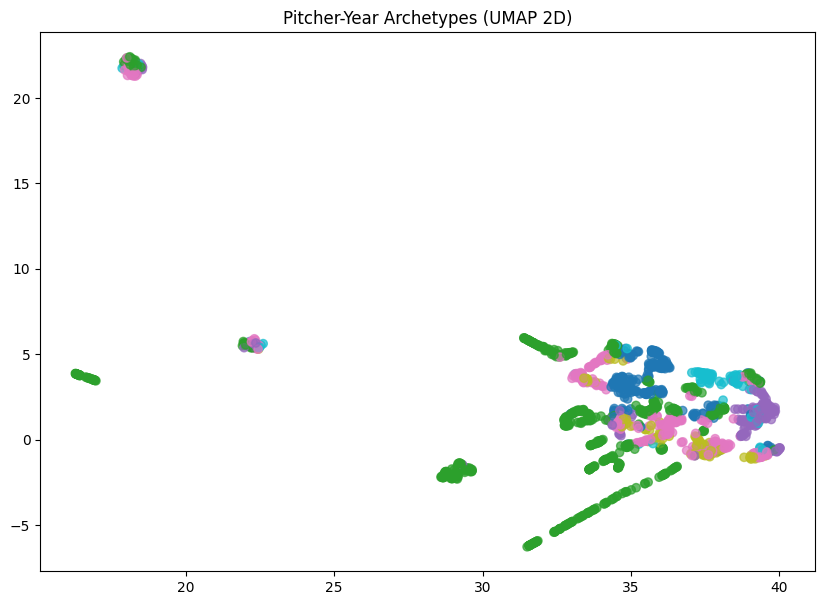

In [452]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_pitcher_year_scaled)

plt.figure(figsize=(10,7))
plt.scatter(
    X_umap[:,0], X_umap[:,1],
    c=pitcher_year_vectors["archetype"],
    cmap="tab10",
    alpha=0.7
)
plt.title("Pitcher-Year Archetypes (UMAP 2D)")
plt.show()


c:\Users\alexl\miniconda3\envs\cs6220\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


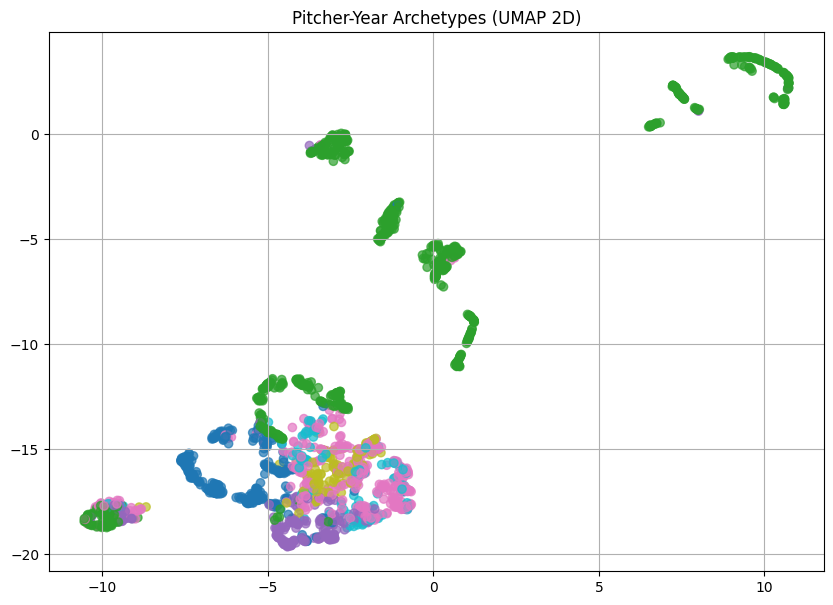

In [459]:
categorical_cols = ["FF_type","SL_type","SI_type","CH_type","CU_type","FC_type","FS_type"]
numeric_usage_cols = ["FF","SL","SI","CH","CU","FC","FS","FO","FS","KN","SC","ST","SV"]

X_cat   = pitcher_year_vectors[categorical_cols].values
X_usage = scaler.fit_transform(pitcher_year_vectors[numeric_usage_cols])

X_final = np.hstack([X_cat, X_usage])

X_cat[X_cat < 0] = 0

reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_final)
pitcher_year_vectors["UMAP1"] = X_umap[:,0]
pitcher_year_vectors["UMAP2"] = X_umap[:,1]

plt.figure(figsize=(10,7))
plt.scatter(
    pitcher_year_vectors["UMAP1"],
    pitcher_year_vectors["UMAP2"],
    c=pitcher_year_vectors["archetype"],
    cmap="tab10",
    alpha=0.7
)
plt.title("Pitcher-Year Archetypes (UMAP 2D)")
plt.grid(True)
plt.show()


In [460]:
pitcher_year_vectors.describe().T


,count,mean,std,min,25%,50%,75%,max
pitcher_id,2081.0,6.282132e+05,59809.111614,425794.000000,605154.000000,643377.000000,669212.000000,820862.000000
year,2081.0,2.022641e+03,1.650632,2020.000000,2021.000000,2023.000000,2024.000000,2025.000000
FF_type,2081.0,2.111004e+00,1.647749,0.000000,0.000000,2.000000,4.000000,4.000000
SL_type,2081.0,6.141278e-01,0.621391,0.000000,0.000000,1.000000,1.000000,2.000000
SI_type,2081.0,6.165305e-01,1.010044,0.000000,0.000000,0.000000,1.000000,3.000000
CH_type,2081.0,1.450264e+00,0.803568,0.000000,1.000000,2.000000,2.000000,2.000000
CU_type,2081.0,1.397405e+00,0.878248,0.000000,0.000000,2.000000,2.000000,2.000000
FC_type,2081.0,2.554061e+00,0.902499,0.000000,3.000000,3.000000,3.000000,3.000000
FS_type,2081.0,1.834214e+00,0.512256,0.000000,2.000000,2.000000,2.000000,2.000000
CH,2081.0,6.962326e+00,11.439288,0.000000,0.000000,0.000000,12.700000,85.600000


In [461]:
rare_cols = ["FO", "SC", "KN", "SV", "ST"]
pitcher_year_vectors = pitcher_year_vectors.drop(columns=rare_cols)

from sklearn.preprocessing import MinMaxScaler

usage_cols = ["FF","SL","SI","CH","CU","FC","FS"]
X_usage = MinMaxScaler().fit_transform(pitcher_year_vectors[usage_cols])

X_cat = pitcher_year_vectors[["FF_type","SL_type","SI_type",
                              "CH_type","CU_type","FC_type","FS_type"]].values

# Combine categorical + scaled usage
X_final = np.hstack([X_cat, X_usage])

import umap

reducer = umap.UMAP(
    n_neighbors=40,
    min_dist=0.05,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_final)

pitcher_year_vectors["U1"] = X_umap[:,0]
pitcher_year_vectors["U2"] = X_umap[:,1]


c:\Users\alexl\miniconda3\envs\cs6220\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


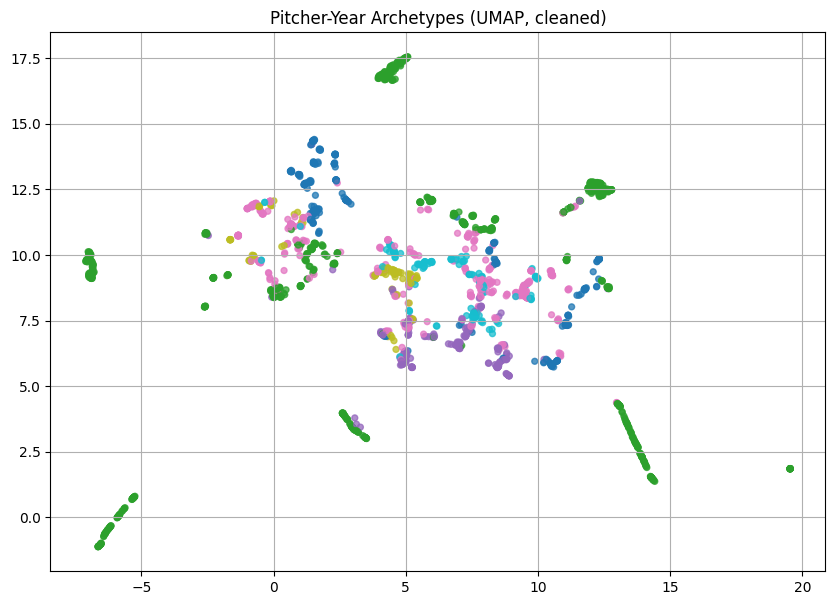

In [462]:
plt.figure(figsize=(10,7))
plt.scatter(
    pitcher_year_vectors["U1"],
    pitcher_year_vectors["U2"],
    s=18,
    c=pitcher_year_vectors["archetype"],
    cmap="tab10",
    alpha=0.75
)
plt.title("Pitcher-Year Archetypes (UMAP, cleaned)")
plt.grid(True)
plt.show()
